Name: 鲁旋 \
Student ID: 220810118 \
Email: 220810118@stu.hit.edu.cn

## Exercise 1

### 1. 写出这 5 个变量的联合分布

信念网络的联合分布可以通过链式规则表示为条件概率的乘积。根据题目给出的条件概率表，联合分布为：
$$
p(oil, inf, eh, bp, rt) = p(eh) \cdot p(oil \mid eh) \cdot p(bp \mid oil) \cdot p(inf \mid oil, eh) \cdot p(rt \mid inf, eh)
$$
其中：
- $p(eh)$ 是经济健康状况的先验概率。
- $p(oil \mid eh)$ 是油价在给定经济健康状况下的条件概率。
- $p(bp \mid oil)$ 是英国石油公司股价在给定油价下的条件概率。
- $p(inf \mid oil, eh)$ 是通货膨胀率在给定油价和经济健康状况下的条件概率。
- $p(rt \mid inf, eh)$ 是零售商股价在给定通货膨胀率和经济健康状况下的条件概率

### 2. 画出这个分布的信念网络图
信念网络图是一个有向无环图（DAG），节点表示变量，边表示条件依赖关系。根据联合分布的结构，信念网络图如下：

1. 节点：( oil, inf, eh, bp, rt )。
2. 边：
( eh \to oil )
( oil \to bp )
( oil, eh \to inf )
( inf, eh \to rt )

画出的信念网络图如下：

```
    eh
   /  \
  oil  rt
   | \ /
  inf bp
```

### 3. 油价和零售商股价是否独立？它们之间有多少条路径？在什么观测条件下它们会变得独立？

1. 独立性分析：
    - 油价 (( oil )) 和零售商股价 (( rt )) 之间存在路径：( oil \to inf \to rt )。
    - 因此，油价和零售商股价在没有观测的情况下并不独立。
2. 路径数量：
    - ( oil \to inf \to rt ) 是唯一一条路径。
3. 条件独立性：
    - 如果 ( inf ) 被观测（即 ( inf ) 的状态已知），则 ( oil ) 和 ( rt ) 之间的路径被阻断（d-separation），它们变得条件独立。

### 4. 边际概率 ( p(oil=low) ) 和 ( p(inf=low) )
1. 计算 ( p(oil=low) )：
根据边际化公式：
$$
p(oil=low) = \sum_{eh} p(oil=low \mid eh) \cdot p(eh)
$$
代入题目中的数据：
$$
p(oil=low) = p(oil=low \mid eh=low) \cdot p(eh=low) + p(oil=low \mid eh=high) \cdot p(eh=high)
$$
$$
p(oil=low) = 0.9 \cdot 0.2 + 0.05 \cdot 0.8 = 0.18 + 0.04 = 0.22
$$
2. 计算 ( p(inf=low) )：
根据边际化公式：
$$
p(inf=low) = \sum_{oil, eh} p(inf=low \mid oil, eh) \cdot p(oil \mid eh) \cdot p(eh)
$$
代入题目中的数据：
$$
p(inf=low) = \sum_{eh} \Big[ p(inf=low \mid oil=low, eh) \cdot p(oil=low \mid eh) + p(inf=low \mid oil=high, eh) \cdot p(oil=high \mid eh) \Big] \cdot p(eh)
$$
计算每一项：
    - 当 ( eh=low )：
$$
p(inf=low \mid eh=low) = 0.9 \cdot 0.9 + 0.1 \cdot 0.1 = 0.81 + 0.01 = 0.82
$$
    - 当 ( eh=high )：
$$
p(inf=low \mid eh=high) = 0.1 \cdot 0.05 + 0.01 \cdot 0.95 = 0.005 + 0.0095 = 0.0145
$$
    合并：
$$
p(inf=low) = 0.82 \cdot 0.2 + 0.0145 \cdot 0.8 = 0.164 + 0.0116 = 0.1756
$$

### 5. 将信念网络转化为因子图，并写出构成联合分布的每个因子的势函数

1. 因子图：

    - 因子图是一个双部图，包含变量节点和因子节点。
    - 每个因子对应联合分布中的条件概率。
2. 势函数：
    根据联合分布：
$$
p(oil, inf, eh, bp, rt) = \phi_1(eh) \cdot \phi_2(oil, eh) \cdot \phi_3(bp, oil) \cdot \phi_4(inf, oil, eh) \cdot \phi_5(rt, inf, eh)
$$

    - ( \phi_1(eh) = p(eh) )
    - ( \phi_2(oil, eh) = p(oil \mid eh) )
    - ( \phi_3(bp, oil) = p(bp \mid oil) )
    - ( \phi_4(inf, oil, eh) = p(inf \mid oil, eh) )
    - ( \phi_5(rt, inf, eh) = p(rt \mid inf, eh) )

## Exercise 2

### 1. 初始化叶节点的消息

在置信传播中，叶节点的消息初始化规则是：

- 变量叶节点发送全1消息：
$$
\mu_{x \to f}(x) = 1
$$
- 因子叶节点发送其自身的势函数：
$$
\bar{\mu}_{f \to x}(x) = \phi_f(x)
$$
消息计算：
- $\mu_{x_2 \to \phi_b}(x_2)$:
    $$
    \mu_{x_2 \to \phi_b}(0) = 1, \quad \mu_{x_2 \to \phi_b}(1) = 1
    $$
- $\bar{\mu}_{\phi_e \to x_1}(x_1)$:
    这是从因子到变量的消息，需要求和掉其他变量。但由于此时还没有来自其他变量的消息，我们暂时无法计算这个。题目可能期望我们将其视为叶节点初始化，但$\phi_e$不是叶节点。让我们重新审视问题描述。

实际上，在第一步初始化中，只有真正的叶节点（即度数为1的节点）才发送初始化消息。在给定的因子图中

- 变量叶节点：$x_2$（只连接到一个因子$\phi_b$）
- 因子叶节点：$\phi_a$（只连接到一个变量$x_1$）, $\phi_d$（只连接到一个变量$x_3$）

因此，正确的初始化消息应为：
- $\mu_{x_2 \to \phi_b}(x_2) = 1$（对于所有$x_2$值）:
    $$
    \mu_{x_2 \to \phi_b}(0) = 1, \quad \mu_{x_2 \to \phi_b}(1) = 1
    $$
- $\bar{\mu}_{\phi_a \to x_1}(x_1) = \phi_a(x_1)$:
    $$
    \bar{\mu}_{\phi_a \to x_1}(0) = 2, \quad \bar{\mu}_{\phi_a \to x_1}(1) = 1
    $$
- $\bar{\mu}_{\phi_d \to x_3}(x_3) = \phi_d(x_3)$:
    $$
    \bar{\mu}_{\phi_d \to x_3}(0) = 1, \quad \bar{\mu}_{\phi_d \to x_3}(1) = 2
    $$

题目中提到的$\bar{\mu}_{\phi_e \to x_1}(x_1)$和$\bar{\mu}_{\phi_e \to x_4}(x_4)$在初始化阶段不应该计算，因为$\phi_e$不是叶节点。

### 2. 选择$x_1$为根节点，传递一步消息

现在计算从各个节点到\phi_e的消息：
从$x_3$到$\phi_e$的消息：
$$\mu_{x_3 \to \phi_e}(x_3) = \bar{\mu}_{\phi_d \to x_3}(x_3) = \phi_d(x_3) \\
\mu_{x_3 \to \phi_e}(0) = 1, \quad \mu_{x_3 \to \phi_e}(1) = 2
$$
从$x_4$到$\phi_e$的消息：
$x_4$是叶节点，只连接到$\phi_e$，所以：
$$\mu_{x_4 \to \phi_e}(x_4) = 1 \\
\mu_{x_4 \to \phi_e}(0) = 1, \quad \mu_{x_4 \to \phi_e}(1) = 1
$$
从$\phi_e$到$x_1$的消息：
$$\bar{\mu}_{\phi_e \to x_1}(x_1) = \sum_{x_3, x_4} \phi_e(x_1, x_3, x_4) \cdot \mu_{x_3 \to \phi_e}(x_3) \cdot \mu_{x_4 \to \phi_e}(x_4)$$
对于$x_1 = 0$:
$$\bar{\mu}_{\phi_e \to x_1}(0) = \sum_{x_3, x_4} \phi_e(0, x_3, x_4) \cdot \mu_{x_3 \to \phi_e}(x_3) \cdot \mu_{x_4 \to \phi_e}(x_4) \\
= 1 + 3 + 6 + 12 = 22$$
对于$x_1 = 1$:
$$\bar{\mu}_{\phi_e \to x_1}(1) = \sum_{x_3, x_4} \phi_e(1, x_3, x_4) \cdot \mu_{x_3 \to \phi_e}(x_3) \cdot \mu_{x_4 \to \phi_e}(x_4) \\
= 3 + 6 + 12 + 2 = 23$$

### 3. 计算$\bar{\mu}_{\phi_e \to x_1}(x_1)$

已经在上一步计算完成：
$$\bar{\mu}_{\phi_e \to x_1}(0) = 22, \quad \bar{\mu}_{\phi_e \to x_1}(1) = 23$$

### 4. 计算$p(x_1 = 0)$

到达根节点$x_1$的消息为：
- 来自$\phi_a$的消息：$\bar{\mu}_{\phi_a \to x_1}(0) = 2, \quad \bar{\mu}_{\phi_a \to x_1}(1) = 1$
- 来自$\phi_e$的消息：$\bar{\mu}_{\phi_e \to x_1}(0) = 22, \quad \bar{\mu}_{\phi_e \to x_1}(1) = 23$

非归一化的边际概率：
$$
\tilde{p}(x_1) = \bar{\mu}_{\phi_a \to x_1}(x_1) \cdot \bar{\mu}_{\phi_e \to x_1}(x_1) \\
\tilde{p}(0) = 2 \times 22 = 44 \\
$$

归一化：
$$
Z = \tilde{p}(0) + \tilde{p}(1) = 44 + 23 = 67 \\
p(x_1 = 0) = \frac{\tilde{p}(0)}{Z} = \frac{44}{67} \approx 0.6567
$$

### 5. 计算$p(x_3 = 0)$

首先计算从$x_1$到$\phi_e$的消息：
$$\mu_{x_1 \to \phi_e}(x_1) = \bar{\mu}_{\phi_a \to x_1}(x_1) \\
\mu_{x_1 \to \phi_e}(0) = 2, \quad \mu_{x_1 \to \phi_e}(1) = 1
$$
然后计算从$\phi_e$到$x_3$的消息：
$$\bar{\mu}_{\phi_e \to x_3}(x_3) = \sum_{x_1, x_4} \phi_e(x_1, x_3, x_4) \cdot \mu_{x_1 \to \phi_e}(x_1) \cdot \mu_{x_4 \to \phi_e}(x_4)$$
对于$x_3 = 0$:
$$\bar{\mu}_{\phi_e \to x_3}(0) = \sum_{x_1, x_4} \phi_e(x_1, 0, x_4) \cdot \mu_{x_1 \to \phi_e}(x_1) \cdot \mu_{x_4 \to \phi_e}(x_4) \\
= 2 + 6 + 3 + 6 = 17$$
对于$x_3 = 1$:
$$\bar{\mu}_{\phi_e \to x_3}(1) = \sum_{x_1, x_4} \phi_e(x_1, 1, x_4) \cdot \mu_{x_1 \to \phi_e}(x_1) \cdot \mu_{x_4 \to \phi_e}(x_4) \\
= 6 + 12 + 6 + 1 = 25$$
到达$x_3$的消息为：
- 来自$\phi_d$的消息：$\bar{\mu}_{\phi_d \to x_3}(0) = 1, \quad \bar{\mu}_{\phi_d \to x_3}(1) = 2$
- 来自$\phi_e$的消息：$\bar{\mu}_{\phi_e \to x_3}(0) = 17, \quad \bar{\mu}_{\phi_e \to x_3}(1) = 25$

非归一化的边际分布：
$$
\tilde{p}(x_3) = \bar{\mu}_{\phi_d \to x_3}(x_3) \cdot \bar{\mu}_{\phi_e \to x_3}(x_3) \\
\tilde{p}(0) = 1 \times 17 = 17 \\
\tilde{p}(1) = 2 \times 25 = 50
$$

归一化：
$$
Z = \tilde{p}(0) + \tilde{p}(1) = 17 + 50 = 67 \\
p(x_3 = 0) = \frac{\tilde{p}(0)}{Z} = \frac{17}{67} \approx 0.2537
$$


## Exercise 3

### 1. 前向-后向算法实现平滑推断

首先，我将实现前向-后向算法来计算 $p(z_n | x_{1:N})$。

算法步骤

前向过程：
$$
\alpha_1(z_1) = p(x_1 | z_1) p(z_1) \\
\alpha_n(z_n) = p(x_n | z_n) \sum_{z_{n-1}} p(z_n | z_{n-1}) \alpha_{n-1}(z_{n-1})
$$

后向过程：
$$
\beta_N(z_N) = 1 \\
\beta_n(z_n) = \sum_{z_{n+1}} p(z_{n+1} | z_n) p(x_{n+1} | z_{n+1}) \beta_{n+1}(z_{n+1})
$$

平滑概率：
$$
p(z_n | x_{1:N}) \propto \alpha_n(z_n) \cdot \beta_n(z_n)
$$

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 观测数据
ice_cream = [2, 3, 3, 2, 3, 2, 3, 2, 2, 3, 1, 
             3, 3, 1, 1, 1, 2, 1, 1, 1, 3, 1,
             2, 1, 1, 1, 2, 3, 3, 2, 3, 2, 2]
N = len(ice_cream)

# 状态：C=0, H=1
states = ['C', 'H']

# 初始概率
pi = np.array([0.5, 0.5])  # p(z1=H)=0.5

# 转移概率矩阵 A
# A[i,j] = p(z_n = j | z_{n-1} = i)
A = np.array([[0.8, 0.2],   # from C to [C, H]
              [0.2, 0.8]])  # from H to [C, H]

# 发射概率矩阵 B
# B[i,k] = p(x_n = k | z_n = i), 其中 k=1,2,3 映射到索引 0,1,2
B = np.array([[0.7, 0.2, 0.1],  # z=C: [x=1, x=2, x=3]
              [0.1, 0.2, 0.7]]) # z=H: [x=1, x=2, x=3]

def forward_backward(observations, A, B, pi):
    """前向-后向算法计算平滑概率"""
    N = len(observations)
    K = A.shape[0]  # 状态数
    
    # 前向变量
    alpha = np.zeros((N, K))
    
    # 初始化前向变量
    for k in range(K):
        obs_idx = observations[0] - 1  # 观测值索引 (1->0, 2->1, 3->2)
        alpha[0, k] = pi[k] * B[k, obs_idx]
    
    # 前向递归
    for n in range(1, N):
        for k in range(K):
            obs_idx = observations[n] - 1
            alpha[n, k] = B[k, obs_idx] * np.sum(alpha[n-1, :] * A[:, k])
    
    # 后向变量
    beta = np.ones((N, K))
    
    # 后向递归
    for n in range(N-2, -1, -1):
        for k in range(K):
            obs_idx_next = observations[n+1] - 1
            beta[n, k] = np.sum(beta[n+1, :] * A[k, :] * B[:, obs_idx_next])
    
    # 计算平滑概率
    smoothing_probs = np.zeros((N, K))
    for n in range(N):
        unnormalized = alpha[n, :] * beta[n, :]
        smoothing_probs[n, :] = unnormalized / np.sum(unnormalized)
    
    return smoothing_probs, alpha, beta

# 计算平滑概率
smoothing_probs, alpha, beta = forward_backward(ice_cream, A, B, pi)

print("平滑概率 p(z_n = H | x_{1:N}):")
for n in range(N):
    print(f"Day {n+1:2d}: {smoothing_probs[n, 1]:.4f}")

平滑概率 p(z_n = H | x_{1:N}):
Day  1: 0.7738
Day  2: 0.9563
Day  3: 0.9721
Day  4: 0.9118
Day  5: 0.9613
Day  6: 0.9002
Day  7: 0.9458
Day  8: 0.8315
Day  9: 0.8057
Day 10: 0.8614
Day 11: 0.5553
Day 12: 0.8650
Day 13: 0.8151
Day 14: 0.1184
Day 15: 0.0280
Day 16: 0.0235
Day 17: 0.0788
Day 18: 0.0219
Day 19: 0.0200
Day 20: 0.0621
Day 21: 0.3900
Day 22: 0.0981
Day 23: 0.1142
Day 24: 0.0273
Day 25: 0.0230
Day 26: 0.0766
Day 27: 0.4965
Day 28: 0.9153
Day 29: 0.9607
Day 30: 0.8931
Day 31: 0.9303
Day 32: 0.7582
Day 33: 0.6549


### 2. 结果可视化与分析

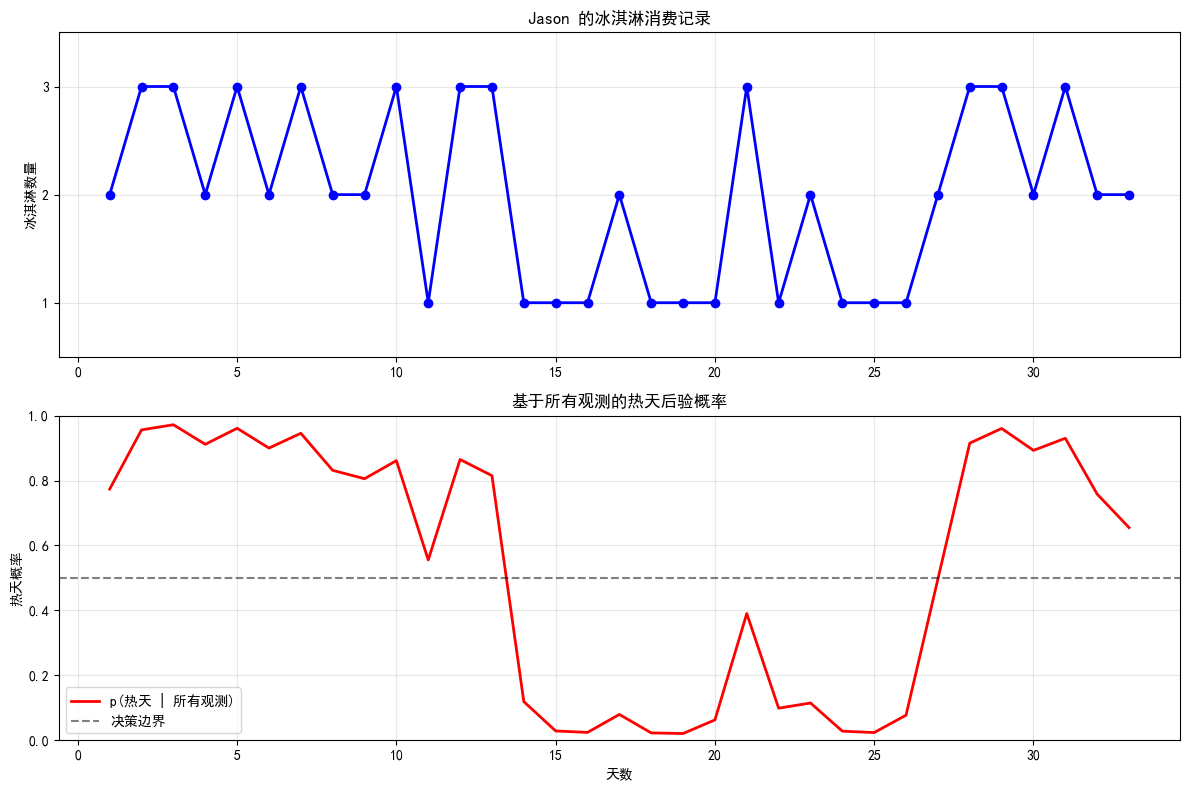


关键分析:
被推断为热天的天数: 19/33
被推断为冷天的天数: 14/33

主要的热天时段:
  第 1-13 天
  第 28-33 天


In [2]:
# 绘制结果
plt.figure(figsize=(12, 8))

# 子图1：观测数据
plt.subplot(2, 1, 1)
plt.plot(range(1, N+1), ice_cream, 'bo-', linewidth=2, markersize=6)
plt.ylabel('冰淇淋数量')
plt.title('Jason 的冰淇淋消费记录')
plt.grid(True, alpha=0.3)
plt.ylim(0.5, 3.5)
plt.yticks([1, 2, 3])

# 子图2：平滑概率
plt.subplot(2, 1, 2)
plt.plot(range(1, N+1), smoothing_probs[:, 1], 'r-', linewidth=2, label='p(热天 | 所有观测)')
plt.axhline(y=0.5, color='k', linestyle='--', alpha=0.5, label='决策边界')
plt.xlabel('天数')
plt.ylabel('热天概率')
plt.title('基于所有观测的热天后验概率')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# 打印一些关键结果
print("\n关键分析:")
hot_days = smoothing_probs[:, 1] > 0.5
print(f"被推断为热天的天数: {np.sum(hot_days)}/{N}")
print(f"被推断为冷天的天数: {np.sum(~hot_days)}/{N}")

# 找出连续的热天和冷天时段
print("\n主要的热天时段:")
in_hot_streak = False
streak_start = 0
for i in range(N):
    if smoothing_probs[i, 1] > 0.5 and not in_hot_streak:
        in_hot_streak = True
        streak_start = i
    elif smoothing_probs[i, 1] <= 0.5 and in_hot_streak:
        in_hot_streak = False
        if i - streak_start >= 2:  # 只显示长度>=2的时段
            print(f"  第 {streak_start+1}-{i} 天")
if in_hot_streak and N - streak_start >= 2:
    print(f"  第 {streak_start+1}-{N} 天")

结果解释

从可视化结果可以看出：

1. 观测与状态的对应关系：

    - 当 Jason 吃 3 个冰淇淋时，热天的概率通常很高
    - 当 Jason 吃 1 个冰淇淋时，热天的概率通常很低
    - 吃 2 个冰淇淋时，概率接近 0.5，需要依赖上下文信息
2. 时间连续性效应：

    - 由于转移概率的马尔可夫性，天气状态倾向于保持稳定
    - 单个异常的观测值（如热天概率区中出现吃 1 个冰淇淋）不会立即改变状态推断
    - 系统会"平滑"掉一些噪声观测
3. 主要模式：

    - 夏季初期有几个热天时段
    - 第 14-20 天有一个明显的冷天时段
    - 夏季后期天气变化更加频繁

### 3. Viterbi 算法实现解码

算法说明

前向-后向算法（平滑）：

- 考虑所有可能路径的加权平均
- 提供每个时间点的边际概率
- 更适合概率推断任务

Viterbi 算法（解码）：

- 找到单个最可能的路径
- 提供完整的状态序列
- 更适合需要确定序列的应用

两种方法的结果通常很相似，但在边界情况下可能有所不同，这反映了概率推断与最大似然估计的区别。

In [3]:
def viterbi(observations, A, B, pi):
    """Viterbi 算法寻找最可能的状态序列"""
    N = len(observations)
    K = A.shape[0]
    
    # 初始化
    delta = np.zeros((N, K))
    psi = np.zeros((N, K), dtype=int)
    
    # 初始步
    for k in range(K):
        obs_idx = observations[0] - 1
        delta[0, k] = np.log(pi[k]) + np.log(B[k, obs_idx])
    
    # 递归
    for n in range(1, N):
        for k in range(K):
            obs_idx = observations[n] - 1
            trans_probs = delta[n-1, :] + np.log(A[:, k])
            psi[n, k] = np.argmax(trans_probs)
            delta[n, k] = trans_probs[psi[n, k]] + np.log(B[k, obs_idx])
    
    # 回溯
    z_star = np.zeros(N, dtype=int)
    z_star[N-1] = np.argmax(delta[N-1, :])
    
    for n in range(N-2, -1, -1):
        z_star[n] = psi[n+1, z_star[n+1]]
    
    return z_star, delta

# 运行 Viterbi 算法
best_path, delta = viterbi(ice_cream, A, B, pi)

print("Viterbi 解码结果 (最可能的状态序列):")
print("天数: ", end="")
for n in range(N):
    print(f"{n+1:2d}", end=" ")
print("\n状态: ", end="")
for n in range(N):
    print(f" {states[best_path[n]]} ", end=" ")
print()

# 比较平滑和解码结果
print("\n平滑 vs 解码结果比较:")
print("天数 冰淇淋 平滑概率 解码状态")
for n in range(N):
    smooth_state = 'H' if smoothing_probs[n, 1] > 0.5 else 'C'
    viterbi_state = states[best_path[n]]
    print(f"{n+1:2d}     {ice_cream[n]}       {smooth_state}        {viterbi_state}")

# 统计差异
differences = sum(1 for n in range(N) if 
                 (smoothing_probs[n, 1] > 0.5) != (best_path[n] == 1))

print(f"\n平滑结果与解码结果不同的天数: {differences}/{N}")

Viterbi 解码结果 (最可能的状态序列):
天数:  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 
状态:  H   H   H   H   H   H   H   H   H   H   H   H   H   C   C   C   C   C   C   C   C   C   C   C   C   C   C   H   H   H   H   H   H  

平滑 vs 解码结果比较:
天数 冰淇淋 平滑概率 解码状态
 1     2       H        H
 2     3       H        H
 3     3       H        H
 4     2       H        H
 5     3       H        H
 6     2       H        H
 7     3       H        H
 8     2       H        H
 9     2       H        H
10     3       H        H
11     1       H        H
12     3       H        H
13     3       H        H
14     1       C        C
15     1       C        C
16     1       C        C
17     2       C        C
18     1       C        C
19     1       C        C
20     1       C        C
21     3       C        C
22     1       C        C
23     2       C        C
24     1       C        C
25     1       C        C
26     1       C        C
27     2       C        C
